In [1]:
import cv2
import numpy as np
import  kociemba
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
import skimage as sk
import skimage.io as skio
import scipy.cluster
import sklearn.cluster

In [166]:
image = cv2.imread('We.jpeg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (150, 250), interpolation = cv2.INTER_AREA)
cv.GaussianBlur(img,(5,5),0)
plt.imshow(image)
plt.show()

NameError: name 'cv' is not defined

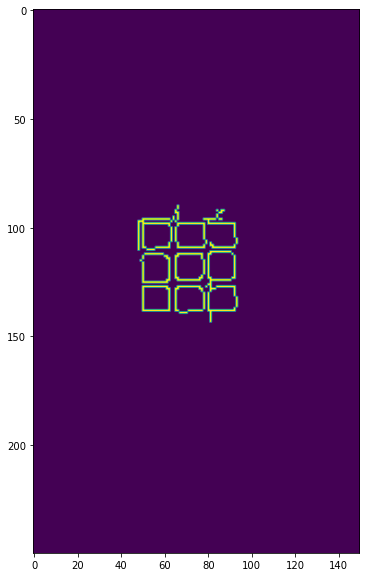

In [170]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
low_threshold = 50
high_threshold = 600
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.figure(figsize=(10,10))
plt.imshow(edges)

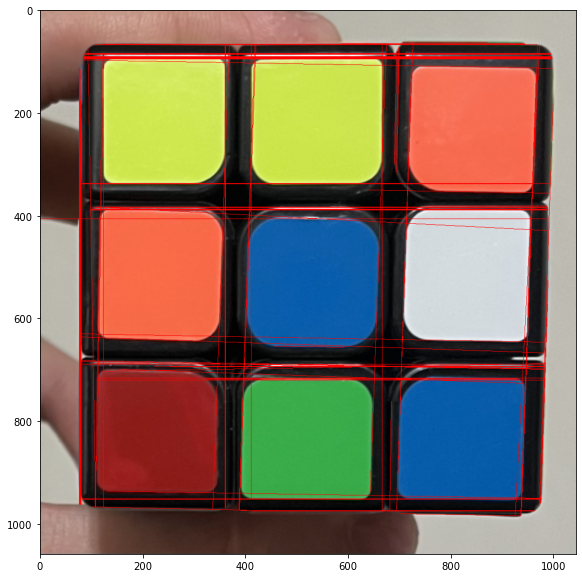

In [148]:
rho = 1
theta = np.pi/180
threshold =80
min_line_length = 40
max_line_gap = 400
line_image = np.copy(image)
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),1)
plt.figure(figsize=(10,10))
plt.imshow(line_image)

In [153]:
candi = []
for i in lines:
    for j in lines:
        if ((i == j).all()):
            continue
        if (abs(i[0][0] - j[0][0]) < 10 and abs(i[0][1] - j[0][1]) < 10):
            candi.append((i,j))
        elif (abs(i[0][0] - j[0][2]) < 10 and abs(i[0][1] - j[0][3]) < 10):
            candi.append((i,j))
len(candi)

169

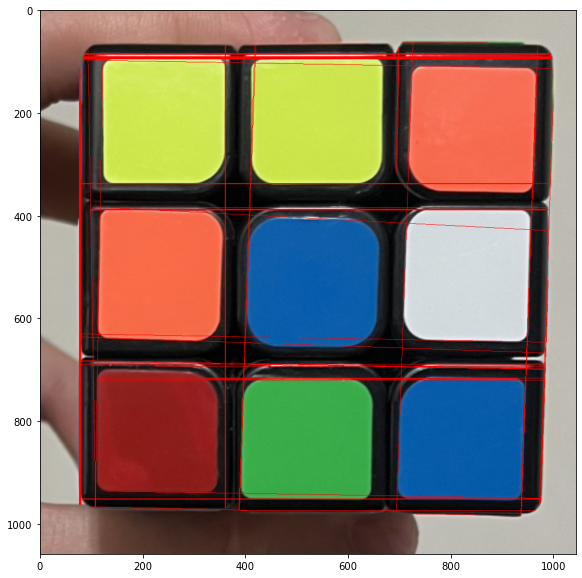

In [154]:
line_image = np.copy(image)
for pair in candi:
    for line in pair:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),1)
plt.figure(figsize=(10,10))
plt.imshow(line_image)

In [158]:
import math 
real_can = []
for pair in candi:
    line1 = pair[0][0]
    line2 = pair[1][0]
    a1 = math.atan2(line1[3]-line1[1],line1[2]-line1[0])
    a2 = math.atan2(line2[3]-line2[1],line2[2]-line2[0])
    if a1<0:a1+=np.pi
    if a2<0:a2+=np.pi
    ang=abs(abs(a2-a1)-np.pi/2)
    lenght1 = math.sqrt(((line1[0]-line1[2])**2)+((line1[1]-line1[3])**2))
    lenght2 = math.sqrt(((line2[0]-line2[2])**2)+((line2[1]-line2[3])**2))
    if ang < 0.5 and abs(lenght1 - lenght2) < 20:
        real_can.append(pair)
len(real_can)

2

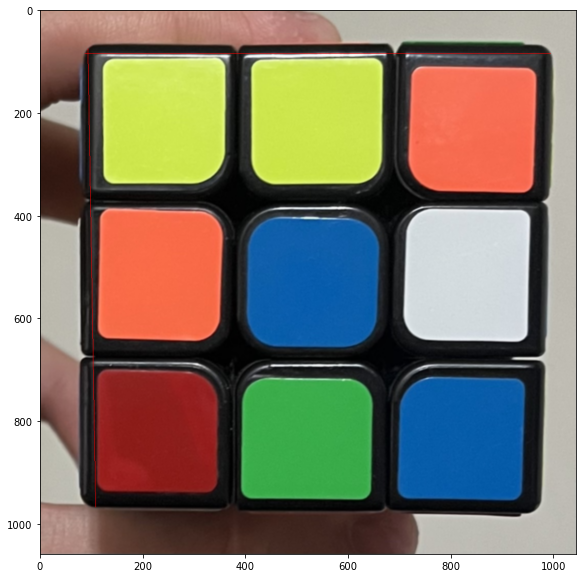

In [159]:
line_image = np.copy(image)
for pair in real_can:
    for line in pair:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),1)
plt.figure(figsize=(10,10))
plt.imshow(line_image)

In [160]:
xs = []
ys = []
for pair in real_can:
    for line in pair:
        for x1,y1,x2,y2 in line:
            xs += [x1, x2]
            ys += [y1, y2]

In [161]:
xs

[93, 108, 87, 994, 87, 994, 93, 108]

In [162]:
max_x = max(xs)
min_x = min(xs)
min_y = min(ys)
max_y = max(ys)

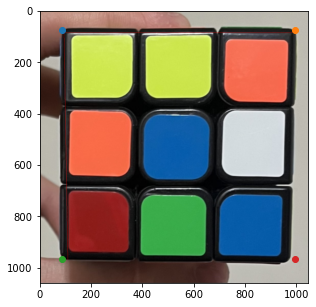

In [163]:
plt.figure(figsize=(5, 5))
plt.imshow(line_image)
plt.scatter(min_x, min_y)
plt.scatter(max_x, min_y)
plt.scatter(min_x, max_y)
plt.scatter(max_x, max_y)
plt.show()

In [164]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, image = cap.read()
    image = cv2.resize(image, (250, 150), interpolation = cv2.INTER_AREA)
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 3)
    low_threshold = 50
    high_threshold = 100
    edges = cv2.Canny(blur, low_threshold, high_threshold)
    rho = 1
    theta = np.pi/180
    threshold = 70
    min_line_length = 30
    max_line_gap = 10
    line_image = np.copy(edges)
    cline_imagegray = cv2.cvtColor(line_image, cv2.COLOR_GRAY2RGB)
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    
    try:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(cline_imagegray,(x1,y1),(x2,y2),(0,0,255),2)
    except:
        cv2.imshow('frame', cline_imagegray)
        cv2.waitKey(1)
        continue
    cv2.imshow('frame', cline_imagegray)
    if cv2.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
cap = cv2.VideoCapture(1)
ret, image = cap.read()

In [12]:
cv2.imshow('frame', image)
cv2.waitKey(1)

-1

In [9]:
image = cv2.resize(image, (250, 150), interpolation = cv2.INTER_AREA)

In [50]:
line_image.shape

(150, 250)